# Ex 1: Basic concepts on random variables and probability distributions

## Introduction
This notebook includes a series of cells with code (Python) and descriptive text (markdown) and provides a number of exercises. Work through the exercises and add, as appropriate, new cells with your code 
or descriptive text to answer the questions. All required data are provided in your exercise folder.

To submit your work, follow the steps '**Before you submit**' and '**How to submit**' in the *intro2notebook.ipynb* file contained in the *ex0_introduction_to_python.zip*.

Please note, that this is the same for all following exercises.

### Part I: Basic statistics and probability calculation

In [232]:
#First import some of the basic python packages we want to use:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import hypergeom, binom, poisson, norm
import math
%matplotlib inline

#### Question 1

From monthly data (file *P_uppmonth1.dat*): compute for each month (column wise) mean, median, mode, standard deviation, coefficient of variation, minimum and maximum. Plot these values (except the mode) to show the annual variation. Note that coefficient of variation has a different unit than the other statistics, and thus needs to be plotted in a separate figure.

In [2]:
# Basic statistics can be easily calculated by defining DataFrames in pandas (like we did above)

# To add all of the values in a particular column of a DataFrame (or a Series), you can do the following:
# df[‘column_name’].sum()


# Note: Passing the argument of axis=0 returns the mean of every single column in the DataFrame; e.g. df.mean(axis=0)
#       Passing the argument of axis=1 returns the mean of every single  row   in the DataFrame; e.g. df.mean(axis=1)

In [3]:
# Reading the monthly data file
monthly_data = pd.read_csv('P_uppmonth1.dat',index_col = 0, sep="\t") # reading the file with monthly data
monthly_data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1981,32,26,62,22,23,98,80,163,13,122,144,109
1982,42,30,54,50,192,37,52,77,48,46,74,52
1983,78,10,107,46,36,105,80,25,188,58,36,78
1984,72,29,34,11,29,97,67,51,145,114,51,51
1985,83,37,42,69,23,25,104,50,76,53,74,63


In [4]:
# Calculating monthly variables
monthly_mean = monthly_data.mean(axis=0) # calculating monthly mean
monthly_median = monthly_data.median(axis=0) # calculating monthly median
monthly_mode = monthly_data.mode(axis=0) # calculating monthly mode
monthly_std = monthly_data.std(axis=0) # calculating monthly standard deviation
monthly_cv = monthly_std/monthly_mean # calculating monthly coefficient of variation
monthly_min = monthly_data.min(axis=0) # calculating monthly minimum
monthly_max = monthly_data.max(axis=0) # calculating monthly maximum

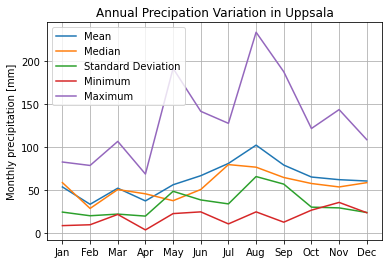

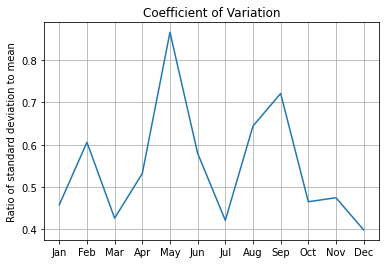

In [227]:
# Making plots to show the annual variation
plt.title('Annual Precipation Variation in Uppsala')
plt.plot(monthly_mean, label='Mean')
plt.plot(monthly_median, label='Median')
plt.plot(monthly_std, label='Standard Deviation')
plt.plot(monthly_min, label='Minimum')
plt.plot(monthly_max, label='Maximum') 
plt.legend(loc='best')
plt.ylabel('Monthly precipitation [mm]')
plt.grid()
plt.show()

plt.title('Coefficient of Variation')
plt.plot(monthly_cv)
plt.ylabel('Ratio of standard deviation to mean')
plt.grid()
plt.show()

#### Question 2

For daily data (file *P_Uppsala.dat*, values in [mm]): Estimate the probability for daily precipitation that

1. Equal zero
2. more than zero
3. more than 10 mm
4. more than 10 mm for days with precipitation

,3
0_1_2,
1981-01-01,1.5
1981-01-02,0.0
1981-01-03,0.0
1981-01-04,0.4
1981-01-05,0.0


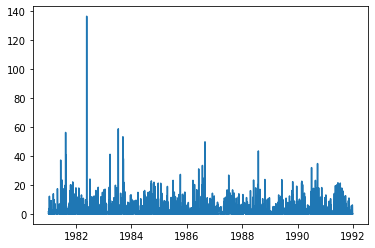

In [6]:
# Reading the daily data file
daily_data = pd.read_csv('P_Uppsala.dat',index_col = 0, parse_dates = [[0, 1, 2]], sep="\t", header=None)
plt.plot(daily_data)
daily_data.head()

In [249]:
# Finding the size of the sample
n = float(np.size(daily_data))
# Finding the number of days with zero rain
nr_of_zeros = daily_data == 0.0 # Boolean array with days with zero rain as 'True'
n_zeros = np.sum(nr_of_zeros).iloc[0] # (using .iloc[0] to extract the number in itself)
# Finding the number of days with rain (more than zero)
n_rain = n - n_zeros
# Finding the number of days with more than 10 mm rain
n_10mm = np.sum(daily_data >= 10.0).iloc[0]

In [8]:
# Making probability estimations
p_zero = n_zeros/n # The estimated probability of zero precipitation
p_rain = n_rain/n # The estimated probability of more than zero precipitation
p_10mm = n_10mm/n # The estimated probability of more than 10 mm precipitation
p_10mm_if_rain = n_10mm/n_rain # The estimated probability of more than 10 mm for days with precipitation
print('--- Estimated probabilities: ---')
print('Probability of 0 mm precipitation: %.2f' %(p_zero*100), '%')
print('Probability of more than 0 mm precipitation: %.2f' %(p_rain*100), '%')
print('Probability of more than 10 mm precipitation: %.2f' %(p_10mm*100), '%')
print('Probability of more than 10 mm for days with precipitation: %.2f' %(p_10mm_if_rain*100), '%')

--- Estimated probabilities: ---
Probability of 0 mm precipitation: 52.83 %
Probability of more than 0 mm precipitation: 47.17 %
Probability of more than 10 mm precipitation: 5.95 %
Probability of more than 10 mm for days with precipitation: 12.61 %


#### Question 3

From the daily data, calculate the maximum 1-day, 3-day and 5-day average rainfall amount, and state the date/period.

*Hint: to compute average over x days, you can check out the pandas dataframe method rolling().*

In [229]:
# Calculating the 1-day maximum amount
one_day_max = daily_data.max().iloc[0]
one_day_max_date = daily_data.idxmax().iloc[0] # Returns the date of the maximum 1-day average rainfall amount

# Calculating the 3-day maximum amount
three_day_avg = daily_data.rolling(3).sum()/3. # Array of average rainfall for the last three days each day
three_day_max = three_day_avg.max().iloc[0] 
three_day_max_date = three_day_avg.idxmax().iloc[0] # Returns the date of the maximum 3-day average rainfall amount

# Calculating the 5-day maximum amount
five_day_avg = daily_data.rolling(5).sum()/5. # Array of average rainfall for the last five days each day
five_day_max = five_day_avg.max().iloc[0] 
five_day_max_date = five_day_avg.idxmax().iloc[0] # Returns the date of the maximum 5-day average rainfall amount

print('Maximum daily rainfall amount: %.2f mm.' %one_day_max, ' Date: %s' %one_day_max_date)
print('Maximum 3-day average rainfall amount: %.2f mm.' %three_day_max, ' Last date: %s' %three_day_max_date)
print('Maximum 3-day average rainfall amount: %.2f mm.' %five_day_max, ' Last date: %s' %five_day_max_date)

Maximum daily rainfall amount: 136.60 mm.  Date: 1982-05-21 00:00:00
Maximum 3-day average rainfall amount: 47.40 mm.  Last date: 1982-05-23 00:00:00
Maximum 3-day average rainfall amount: 29.72 mm.  Last date: 1982-05-24 00:00:00


The maximum rainfall amount in the daily data is 136 mm, which occured on May 21 in 1982. 
The maximum 3-day average rainfall amount is 47.40 mm, which occured in the period May 21 to May 23 in 1982.
The maximum 5-day average rainfall amount is 29.72 mm, which occured in the period May 20 to May 24 in 1982.

We can see that these maxima are all from the same time period, and perhaps correspond to the same extreme precipitation event.

#### Question 4

What is the maximum dry-spell days and the maximum wet-spell days of daily rainfall? When do they occur?

In [210]:
# Creating separate dry and wet days arrays
dry_days = daily_data[daily_data == 0].dropna() # Creating array with only days without precipitation 
wet_days = daily_data[daily_data > 0].dropna() # Creating array with only days with precipitation 

# Finding the difference between the dates in the arrays
dry_spell_days = wet_days.index.to_series().diff() # The dry-pell days are the differences between wet days
wet_spell_days = dry_days.index.to_series().diff() # The wet-spell days are the differences between dry days

# Finding the maximum of the dry-spell days and wet-spell days, and corresponding days
max_dry_spell_days = dry_spell_days.max()
max_dry_spell_days_date = dry_spell_days.idxmax()
max_wet_spell_days = wet_spell_days.max()
max_wet_spell_days_date = wet_spell_days.idxmax()

print('The maximum difference between rain days is %s, and ended on %s.' %(max_dry_spell_days, max_dry_spell_days_date))
print('The maximum difference between dry days is %s, and ended on %s.' %(max_wet_spell_days, max_wet_spell_days_date))

The maximum difference between rain days is 23 days 00:00:00, and ended on 1981-05-25 00:00:00.
The maximum difference between dry days is 24 days 00:00:00, and ended on 1988-02-13 00:00:00.


The maximum number of dry-spell days is 22 days and ended on May 25. 1981. The maximum number of wet-spell days is 23 days and ended on Febuary 13, 1988.

#### Question 5

The depth of clarity of Lake Tahoe was measured at several different places with the results in inches is available in the file *Tahoe.dat*.

1. Plot the histogram (relative frequency) with class intervals of length 5.
2. Plot the cumulative relative frequency and estimate Prob(D≤40)≈? and Prob(15≤D≤30) ≈?

In [17]:
# Reading the Lake Tahoe depth data file
Tahoe_data = pd.read_csv('Tahoe.dat',header=None)
Tahoe_data.head()

,0
0,15.4
1,16.7
2,16.9
3,17.0
4,20.2


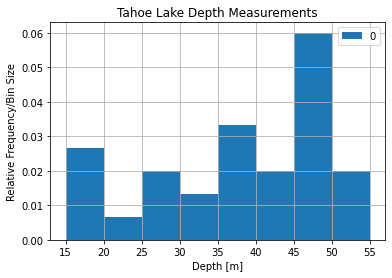

In [231]:
# Plotting the relative frequency as histogram
n = np.size(Tahoe_data) 
bins = np.linspace(15,55,9)
hist = Tahoe_data.plot.hist(bins=bins, density=True)
hist.set_ylabel('Relative Frequency/Bin Size')
hist.set_xlabel('Depth [inches]')
plt.title('Tahoe Lake Depth Measurements')
plt.grid()

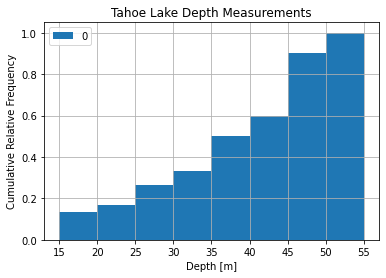

In [92]:
# Plotting the cumulative relative frequency
bins = np.linspace(15,55,9)
cumhist = Tahoe_data.plot.hist(bins=bins,density=True,cumulative=True)
cumhist.set_ylabel('Cumulative Relative Frequency')
cumhist.set_xlabel('Depth [inches]')
plt.title('Tahoe Lake Depth Measurements')
plt.grid()

I estimate the probability from reading off the cumulative relative frequency plot. The probability of having a depth lesser than or equal to 40 inches is around 0.5, while the probability of having a depth between 15 and 30 inches is around 0.27. The last is just the same as having a depth lesser than or equal to 30 m, since the probability of finding depth of 15 inches is zero in the graph since we don't have any data of this. However, there has to be some points in the lake where the depth is than 15 inches as well, so it is likely that the probability is actually different. 

####  Question 6

The frequency function for a continuous stochastic variable is shown below. Solve the problems analytically

$$
f(x) = \left\{
        \begin{array}{ll}
            cx^2 & \quad 0 < x < 1 \\
            0 & \quad \text{otherwise}
        \end{array}
    \right.
$$


1. Find the value for c so that f(x) becomes a density function. Use that $\int_{-\infty }^{\infty }f(x)dx$ = 1.

    $$\int_{-\infty }^{\infty }f(x)dx = \int_{-\infty}^{0}0dx + \int_{0}^{1}cx^2dx + \int_{1}^{\infty} 0dx= 1$$
    $$\int_{0}^{1}cx^2dx = c[\frac{1}{3}x^3]_0^1 = 1$$
    $$c\cdot\frac{1}{3}=1$$
    $$c=3$$
    The value of $c$ needs to be 3 in order for $f(x)$ to become a density function.
    

2. Find the distribution function, F(x)

    The (cumulative) distribution function $F(x)$ is defined as $F(x) = \int_{-\infty}^x f(u)du$
    where $f(u)$ is the density function. Here we have:
    $$F(x) = \int_{-\infty}^x 3f(u)du = \int_{-\infty}^0 0du + \int_{0}^x 3u^2du$$
    $$F(x) = \int_{0}^x 3u^2du = [u^3]_0^x = x^3$$
    assuming that $0 < x < 1$. If we have $x > 1$ we get
    $$F(x) = \int_{-\infty}^x 3f(u)du = \int_{-\infty}^0 0du + \int_{0}^1 3u^2du + \int_{1}^x 0du = [u^3]_0^1 = 1$$
    If we have $x < 0$ we get
    $$F(x) = \int_{-\infty}^x 3f(u)du = \int_{-\infty}^x 0du = 0$$
    
3. Calculate Prob(x < 0), Prob(x = 0.5), Prob(x > 1), Prob(0<=x<=0.5) and Prob(0<x< 0.5)
 
   $P(x < 0) = F(0) = 0$. The probability of $x < 0$ (the value of the cumulative distribution at $x=0$) is 0.
   
   $P(x = 0.5) = \int_{0.5}^{0.5} f(x)dx = 0.$ Because the variable is continuos, the probability of a single value is 0.
   
   $P(x > 1) = \int_1^{\infty} f(x)dx = \int_1^{\infty} 0 dx = 0$. The probability of getting an $x > 1$ is 0.
   
   $P(0 \leq x \leq 0.5) = F(0.5) - F(0) = (0.5)^3 - 0 = 0.125$. The probability of getting $0 \leq x \leq 0.5$ is 12.5 %.
   
   $P(0 < x < 0.5) = P(0 \leq x \leq 0.5) - P(x=0) - P(x=0.5) = 0.125 - 0 - 0 = 0.125.$ The probability of getting 0 < x < 0.5 is 12.5% as well.
   
  
4. Find the median

The median is defined, for a continous variable, as the value X where $P(x \leq X) = P(x \geq X) = 0.5$. I can use the distribution function F(x) to find the x where $P(x \leq X) = 0.5$.
$$F(X) = X^3 = 0.5$$
$$X = 0.5^{\frac{1}{3}} \approx 0.794$$
The median is approximately 0.79.

5. Find the mode

The mode is defined as the value X of the variable with the maximum probability. In other words, it is the maximum value of the density function. The maximum value of the density function is the value right before x = 1, as we can see in the plot underneath, but I cannot find this value by deriving, since the density function is not continous in this point. Instead I state it as something like "the mode is when $x \rightarrow 1$". However, I am not sure if the mode is properly defined in this case. 

6. Calculate the expectation, E(x)

The expectation for a continuous variable is given by $E(x) = \int_{-\infty}^{\infty} xf(x)dx$ where $f(x)$ is the density function. This gives us:
$$E(x) = \int_{-\infty}^{\infty} xf(x)dx = \int_{-\infty}^{0}0dx + \int_{0}^{1}x\cdot3x^2dx + \int_{1}^{\infty} 0dx$$
$$E(x) = \int_{0}^{1}3x^3dx = [3\cdot \frac{1}{4}x^4]_0^1 = \frac{3}{4}$$
7. Calculate the variance, Var(x)


The variance is given by $Var(x) = E(x^2) - E(x)^2$. To find it, we first calculate $E(x^2)$.

$$E(x^2) = \int_{-\infty}^{\infty} x^2f(x)dx = \int_{0}^{1}x^23x^2dx = \int_{0}^{1}3x^4dx =  [3\cdot \frac{1}{5}x^5]_0^1 = \frac{3}{5}$$
We then get the variance
$$Var(x) = E(x^2) - E(x)^2 = \frac{3}{5} - (\frac{3}{4})^2 = \frac{3}{5} - \frac{9}{16} = \frac{48-45}{80} = \frac{3}{80}$$

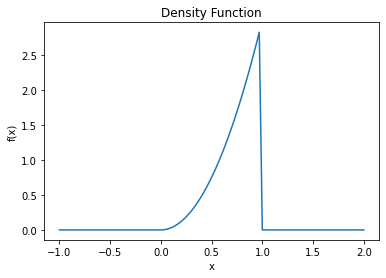

Text(0.5, 1.0, 'Cumulative Distribution Function')

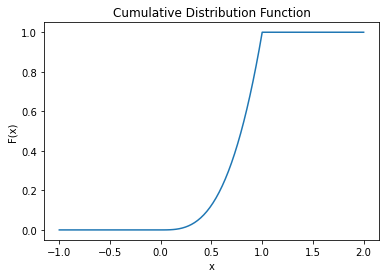

In [117]:
# Visualizing the density and distribution functions in question 6
def density(x):
    f = np.zeros(len(x))
    for i in range(len(x)):
        if 0 < x[i] < 1:
            f[i] = 3*x[i]**2
        else:
            f[i] = 0
    return f

def distribution(x):
    F = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] <= 0:
            F[i] = 0
        elif 0 < x[i] < 1:
            F[i] = x[i]**3
        else: 
            F[i] = 1
    return F

x = np.linspace(-1,2,100)

plt.plot(x,density(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Density Function')
plt.show()

plt.plot(x,distribution(x))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative Distribution Function')

### Part II: Probability distribution

#### Question 1.
The number of rainy days in July and August at a meteorological station is given in the table below.


Year|1|2|3|4|5|6|7|8|9|10|
-|-|-|-|-|-|-|-|-|-|-|
July|10|15|17|8|9|19|17|14|20|4
August|4|9|8|3|0|10|12|2|8|6

##### a ) Use the Hypergeometric, Binomial and Poisson distributions to calculate 
1) What is the probability of 10 rainy days in each of the months of July and August? 

2) What is the probability of 20 rainy days in the 2 month period? 

*Note: if you wish to use factorial function then you have to import the module 'math' by the command 'import math' then write: math.factorial(x)*


* **Hint: Hypergeometric function:**
    - import scipy.stats
    - from scipy.stats import hypergeom
    - hypergeom.pmf(x, N, n, k)
    - where
        - k is the number of "successes" in the population
        - x is the number of "successes" in the sample
        - N is the size of the population
        - n is the number sampled

* **Hint: Binomial distribution**
    - from scipy.stats import binom
    - binom.pmf(x,n,p)
    - where
        - p is the probability of success, and n and x same as for hypergeometric.

* **Hint: Poisson Distribution**
    - from scipy.stats import poisson
    - poisson.pmf(x, λ)
    - where
        - λ =pn


In [241]:
n_years = 10
days_jul = 31
days_aug = 31
rain_days_jul = np.array([10, 15, 17, 8, 9, 19, 17, 14, 20, 4])
rain_days_aug = np.array([4, 9, 8, 3, 0, 10, 12, 2, 8, 6])
total_rain_days_jul = np.sum(rain_days_jul)
total_rain_days_aug = np.sum(rain_days_aug)

# 1) What is the probability of 10 rainy days in each of the months of July and August?
x = 10 # number of rainy days in our sample
n = days_jul # the size of our sample (the number of same number of days in July and August, they have the same n)
N = n*n_years # the size of our population
k_jul = total_rain_days_jul # number of rainy days in our population for July
k_aug = total_rain_days_aug # number of rainy days in our population for August
p_jul = k_jul/N # estimated probability of rain days in July
p_aug = k_aug/N # estimated probability of rain days in August
lambda_jul = n*p_jul 
lambda_aug = n*p_aug

# Hypergeometric distribution
hyper1_jul = hypergeom.pmf(x,N,n,k_jul)
hyper1_aug = hypergeom.pmf(x,N,n,k_aug)

# Binomial distribution
binomial1_jul = binom.pmf(x,n,p_jul)
binomial1_aug = binom.pmf(x,n,p_aug)

# Poisson distribution
poisson1_jul = poisson.pmf(x,lambda_jul)
poisson1_aug = poisson.pmf(x,lambda_aug)

# 2) What is the probability of 20 rainy days in the 2 month period? 
x = 20 # number of rainy days in our sample
n = days_jul + days_aug # the size of our sample
N = n*n_years # the size of our population
k = total_rain_days_jul + total_rain_days_aug # number of rainy days in our population
p = k/N # estimated probability of rain days in the 2 months
lambda_total = n*p

# Hypergeometric distribution
hyper2 = hypergeom.pmf(x,N,n,k)

# Binomial distribution
binomial2 = binom.pmf(x,n,p)

# Poisson distribution
poisson2 = poisson.pmf(x,lambda_total)

print('The probability of 10 rainy days in July is:')
print('Hypergeometric method: %.4f' %hyper1_jul)
print('Binomial method: %.4f' %binomial1_jul)
print('Poisson method: %.4f \n' %poisson1_jul)

print('The probability of 10 rainy days in August is:')
print('Hypergeometric method: %.4f' %hyper1_aug)
print('Binomial method: %.4f' %binomial1_aug)
print('Poisson method: %.4f \n' %poisson1_aug)

print('The probability of 20 rainy days in the 2 month period is:')
print('Hypergeometric method: %.4f' %hyper2)
print('Binomial method: %.4f' %binomial2)
print('Poisson method: %.4f \n' %poisson2)

The probability of 10 rainy days in July is:
Hypergeometric method: 0.0704
Binomial method: 0.0726
Poisson method: 0.0799 

The probability of 10 rainy days in August is:
Hypergeometric method: 0.0385
Binomial method: 0.0419
Poisson method: 0.0469 

The probability of 20 rainy days in the 2 month period is:
Hypergeometric method: 0.1126
Binomial method: 0.1069
Poisson method: 0.0883 



##### b) Which assumptions in each method are likely violated by this problem?

In all the methods we are simply looking at statistics, and not looking at whether rainy days are dependent on each other or not, because of low pressures or something like this. We are assuming that the rainy days are independent of each other, which is probably not a very good assumption. 

However, in the binomial and the Poisson method we are additionally assuming that the probability of rain each day is constant, i. e. that our trials are independent of each other in that we have "replacement" for each trial. The hypergeometric method does not assume this, it does not have constant probability. Instead, the probability of rain days becomes effected by how many rain days we have already had previously in the month - if it has already rained alot, it becomes less likely that it will rain the rest of the month. This is a good assumption (provided that we are only interested in the statistics, and not in the physics behind). The assumption of the binomial and the Poisson method that the probability is constant is likely to violated.

In the Poisson method we additionally assume that the product of n and p will remain constant so the expected number of occurence in any total time interval remains the same. This is not necessarily a good assumption either, and is likely to be violated.

##### c) What is the probability that the sixth rainy day of August occurs on 30 August?

In [250]:
# I use the binomial method (assume constant probability)
# I use the same probability for rain in August (p_aug) as from exercise a)
prob = binom.pmf(5,29, p_aug) # The probability of getting 5 rain days from August 1 to August 29
prob_sixth_on_30th = prob*p_aug # The previous probability multiplied with the probability of getting rain (on the sixth days)
print('The probability of the sixth rain day in August being on August 30th is %.3f.' %prob_sixth_on_30th)

The probability of the sixth rain day in August being on August 30th is 0.036.


#### Question 2
Some politician (who obviously did not go a statistic course) tells the public that the town will be
well prepared to tackle the problems associated with a 10-year flood and that there is nothing to
worry about for the next 9 years. In 10th year, when the flood will occur as he says, the local
flood protection authority will have prepared everything. Compute the probability that the
politician actually is right and that the 10-year flood occurs in tenth year for the first time.

In [134]:
p = 0.10 # Probability of a ten year flood (constant)
x = 1    # Number of flood occurence
n = 10   # Number of years

# Finding the probabilility of the flood occuring one time in the next ten year
prob_one_flood = binom.pmf(x,n,p)

# I have now found the probability of only flood occuring any year in the next ten years.
# However, the scenario where the flood occures in the last year is only one of the ten possible scenarios.
# To find the probability of the flood occuring the last year, I divide by number of years.
prob_last_year = prob_one_flood/n

print('The probability that the flood occurs in the tenth year for the first time is: %0.2f percent' %(prob_last_year*100))

The probability that the flood occurs in the tenth year for the first time is: 3.87 percent


#### Question 3
Assume that the annual maxima discharges in a river station are normally distributed with a mean
of 75 m$^3$/s and a standard deviation of 10 m$^3$/s. What is the probability for any given year to have
a maximum flow that is

a) less than 70 m$^3$/s?

b) larger than 95 m$^3$/s?

c) between 60 and 80 m$^3$/s?

d) What is the flow with 90 % chance to not exceed?

e) What is the flow with 80 % chance to exceed?

f) In which interval (centred on the mean) would 50 % of the flows fall?

 * Hint:You may use the following  functions to find the probability/quantile of our distribution:
     * *scipy.stats.norm(mean, sd).cdf(quantile)# where quantile is a discharge*
     * *scipy.stats.norm(mean, sd).ppf(percentile)#where percentile is a proportion*


In [195]:
mu = 75 # [m³/s], Mean of annual maxima river discharges
sigma = 10 # [m³/s] Standard deviation of annual maxima river discharges
discharge = norm(mu,sigma)


prob_less_70 = discharge.cdf(70) # The probability of the maximum flow being less than 70 m³/s
prob_larger_95 = 1 - discharge.cdf(95) # The probability of the maximum flow being larger than 95 m³/s
prob_between_60_80 = discharge.cdf(80) - discharge.cdf(60) # The probability of the maximum flow being between 60  and 80 m³/s
flow_90_not_exceed = discharge.ppf(0.90) # The flow with 90 % chance to not exceed
flow_80_exceed = discharge.ppf(1 - 0.80) # The flow with 80 % chance to exceed

flow_interval_start = discharge.ppf(0.25) # The flow with a 25 % chance not to exceed (start of interval)
flow_interval_end = discharge.ppf(0.75) # The flow with a 75 % chance not to exceed (end of interval)
deviation_from_mean = (flow_interval_end - flow_interval_start)/2. # The length of the interval from the mean

print('a) The probability of the maximum flow being less than 70 m³/s is %.3f' %prob_less_70)
print('b) The probability of the maximum flow being larger than 95 m³/s is %.3f' %prob_larger_95)
print('c) The probability of the maximum flow being between 60  and 80 m³/s is %.3f' %prob_between_60_80)
print('d) The flow with a 90 percent chance to not exceed is %.1f m³/s' %flow_90_not_exceed)
print('e) The flow with a 80 percent chance to exceed is %.1f m³/s' %flow_80_exceed)
print('f) The interval where 50 percent of the flows fall is between %.1f m³/s' %flow_interval_start, 
      'and %.1f m³/s' %flow_interval_end, 'and the deviation from the mean is %.1f m³/s on both sides' 
      %deviation_from_mean)

a) The probability of the maximum flow being less than 70 m³/s is 0.309
b) The probability of the maximum flow being larger than 95 m³/s is 0.023
c) The probability of the maximum flow being between 60  and 80 m³/s is 0.625
d) The flow with a 90 percent chance to not exceed is 87.8 m³/s
e) The flow with a 80 percent chance to exceed is 66.6 m³/s
f) The interval where 50 percent of the flows fall is between 68.3 m³/s and 81.7 m³/s and the deviation from the mean is 6.7 m³/s on both sides


#### Question 4
Plot the individual terms of the Poisson distribution for λ  = 3. Approximate the Poisson by the normal and plot the normal approximations on the same graph. Optional: Do the same but with λ = 8.

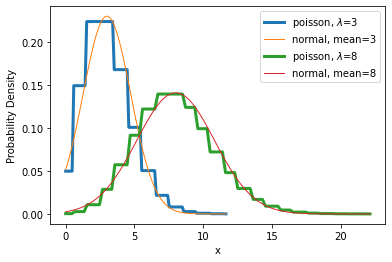

In [238]:
for lambd in [3.,8.]:
    my_mean = lambd
    my_std = np.sqrt(lambd)
    x = np.linspace(0,my_mean+5*my_std,100)
    #plt.scatter(x,poisson.pmf(np.round(x),lambd))#, linewidth=3, label='poisson, lambda=%.0f' %lambd)
    plt.plot(x,poisson.pmf(np.round(x),lambd), linewidth=3, label='poisson, $\lambda$=%.0f' %lambd)
    plt.plot(x,norm.pdf(x,my_mean,my_std), linewidth=1, label= 'normal, mean=%.0f' %lambd)
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()